<a href="https://colab.research.google.com/github/Billy-code123/testpro/blob/main/EDA_Handle_missing_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


EDA and handle missing values

In [ ]:
# Paths to your datasets in Google Drive
base_path = '/content/drive/MyDrive/MSc Artificial Intelligence/Professional Practice & Research Methodology/Fakeddit dataset'
train_file = base_path + '/all_train.tsv'
test_file = base_path + '/all_test_public.tsv'
validate_file = base_path + '/all_validate.tsv'
comments_file = base_path + '/all_comments.tsv'


In [ ]:
import pandas as pd

# Load the datasets
df_train = pd.read_csv(train_file, sep='\t')
df_test = pd.read_csv(test_file, sep='\t')
df_validate = pd.read_csv(validate_file, sep='\t')
df_comments = pd.read_csv(comments_file, sep='\t', engine='python')


In [ ]:
# Display first few rows, column types, and missing values
for df, name in zip([df_train, df_test, df_validate, df_comments], ['Train', 'Test', 'Validate', 'Comments']):
    print(f"Dataset: {name}")
    print(df.info())
    print(df.isnull().sum())
    print(df.head())
    print("\n")


Dataset: Train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878218 entries, 0 to 878217
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0.2          878218 non-null  int64  
 1   Unnamed: 0            878218 non-null  int64  
 2   Unnamed: 0.1          242100 non-null  float64
 3   Unnamed: 0.1.1        242100 non-null  float64
 4   author                729472 non-null  object 
 5   clean_title           802789 non-null  object 
 6   created_utc           878218 non-null  float64
 7   domain                636118 non-null  object 
 8   hasImage              878218 non-null  bool   
 9   id                    878218 non-null  object 
 10  image_url             637564 non-null  object 
 11  linked_submission_id  242100 non-null  object 
 12  num_comments          636118 non-null  float64
 13  score                 878218 non-null  int64  
 14  subreddit             878218 non-null

In [ ]:
comparison_df = df_train[['title', 'clean_title']].sample(10) # Sample for brevity
display(comparison_df)

,title,clean_title
113388,NaN,NaN
572068,Lobbyist Who Played GTA Once Runs Over Solicit...,lobbyist who played gta once runs over solicit...
147554,NaN,NaN
153950,Los Angeles police report possible hostage sit...,los angeles police report possible hostage sit...
573306,Plane crashes during Andes crash memorial,plane crashes during andes crash memorial
537535,HMM...,hmm
567839,Sales of macadamias soar in Korea after nut rage,sales of macadamias soar in korea after nut rage
739752,Park near my house looks like a Pikachu.,park near my house looks like a pikachu
331441,NaN,NaN
494688,PsBattle: SURPRISED CAT WITH ARMS UP,surprised cat with arms up


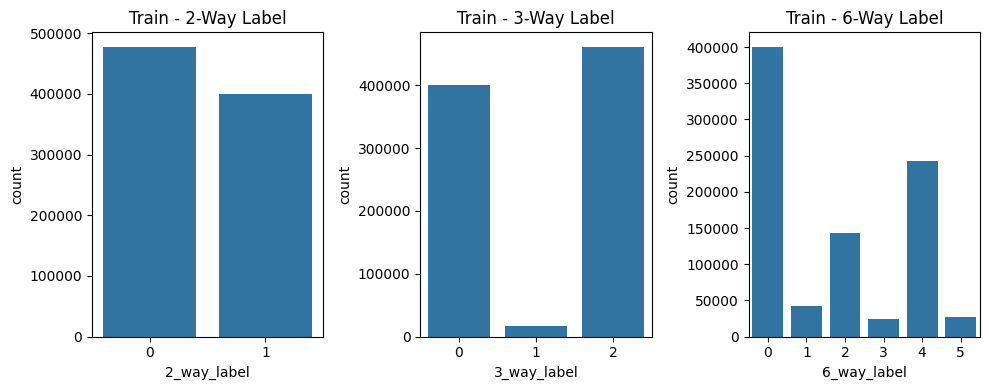

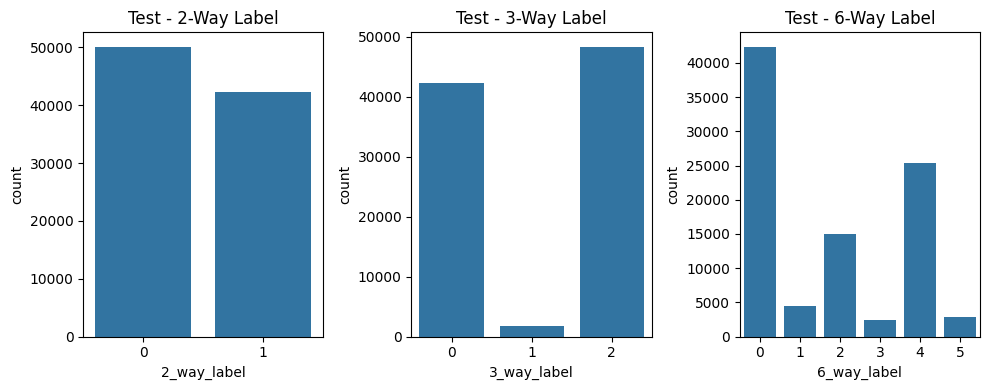

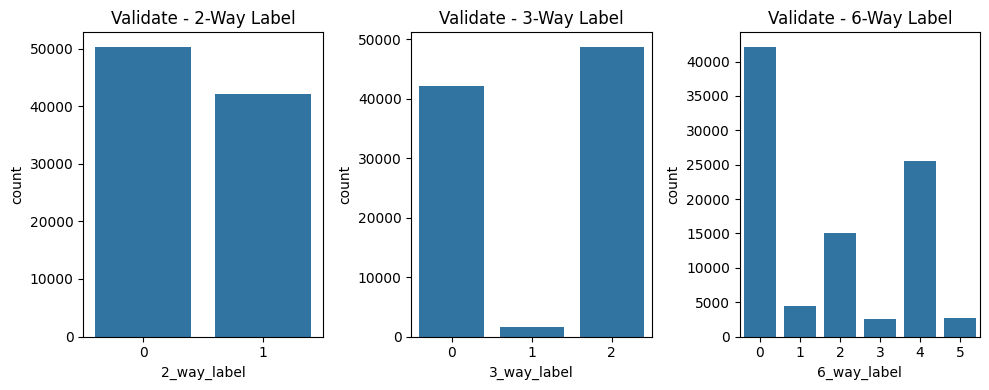

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot label distributions
for df, name in zip([df_train, df_test, df_validate], ['Train', 'Test', 'Validate']):
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 3, 1)
    sns.countplot(x='2_way_label', data=df)
    plt.title(f'{name} - 2-Way Label')

    plt.subplot(1, 3, 2)
    sns.countplot(x='3_way_label', data=df)
    plt.title(f'{name} - 3-Way Label')

    plt.subplot(1, 3, 3)
    sns.countplot(x='6_way_label', data=df)
    plt.title(f'{name} - 6-Way Label')

    plt.tight_layout()
    plt.show()


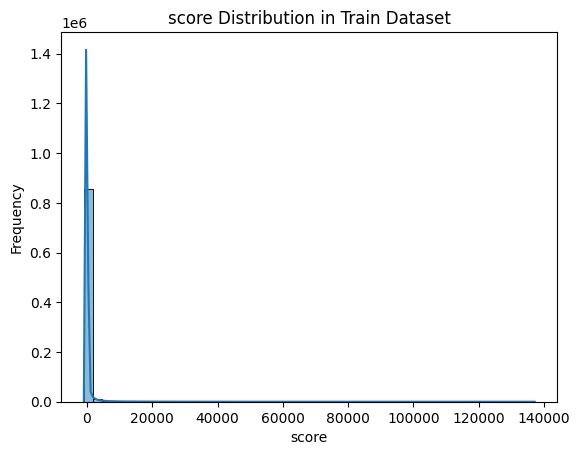

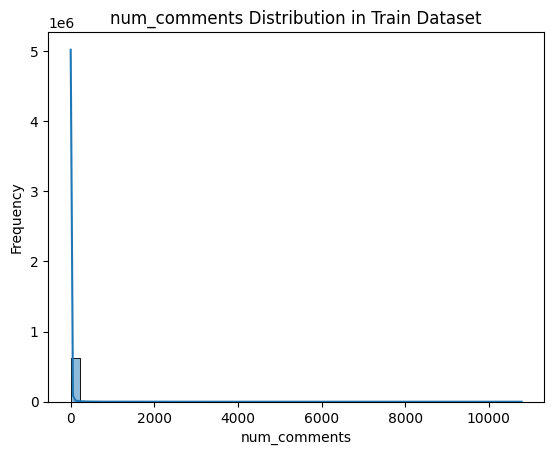

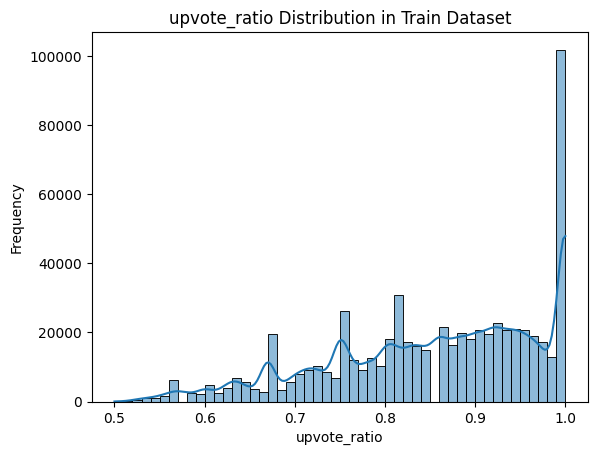

In [ ]:
# Numeric feature distributions
numeric_columns = ['score', 'num_comments', 'upvote_ratio']
for col in numeric_columns:
    plt.figure()
    sns.histplot(df_train[col], bins=50, kde=True)
    plt.title(f'{col} Distribution in Train Dataset')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


In [ ]:
!pip install wordcloud


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 7.7 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


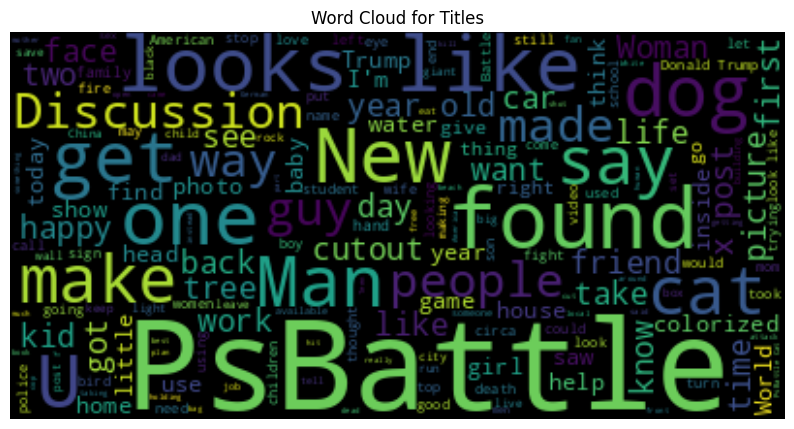

In [ ]:
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud
from nltk.corpus import stopwords


# Combine titles into one string and generate word cloud
title_text = ' '.join(df_train['title'].dropna().astype(str))
wordcloud = WordCloud(stopwords=stopwords.words('english')).generate(title_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Titles')
plt.axis('off')
plt.show()


Top 10 Authors:
 author
ApiContraption       61395
all-top-today_SS      3908
dwaxe                 2645
Sariel007             2085
PSBBot                1965
TheBlazingPhoenix     1857
artunitinc            1701
DrWankalot            1174
menmybabies           1030
DaminDrexil           1005
Name: count, dtype: int64

Top 10 Subreddits:
 subreddit
psbattle_artwork        242100
mildlyinteresting       118596
nottheonion             114456
photoshopbattles         94881
pareidolia               56183
fakehistoryporn          47865
upliftingnews            41867
fakealbumcovers          27632
misleadingthumbnails     23000
subredditsimulator       20265
Name: count, dtype: int64


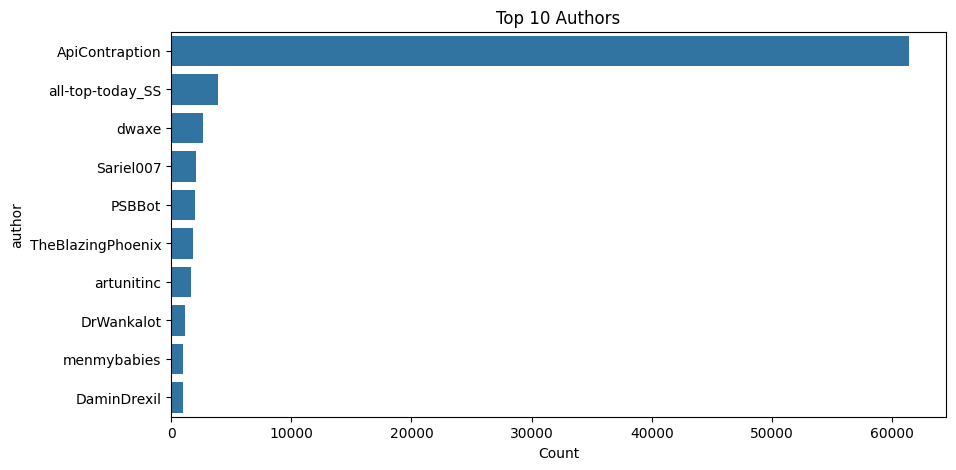

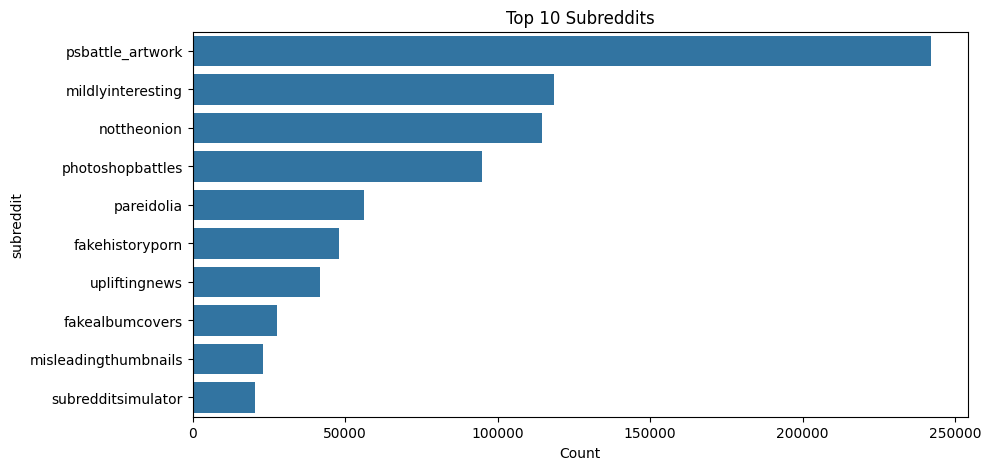

In [ ]:
# Most frequent authors and subreddits
top_authors = df_train['author'].value_counts().head(10)
top_subreddits = df_train['subreddit'].value_counts().head(10)

print("Top 10 Authors:\n", top_authors)
print("\nTop 10 Subreddits:\n", top_subreddits)

# Plotting the distributions
plt.figure(figsize=(10, 5))
sns.barplot(x=top_authors.values, y=top_authors.index)
plt.title('Top 10 Authors')
plt.xlabel('Count')
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x=top_subreddits.values, y=top_subreddits.index)
plt.title('Top 10 Subreddits')
plt.xlabel('Count')
plt.show()


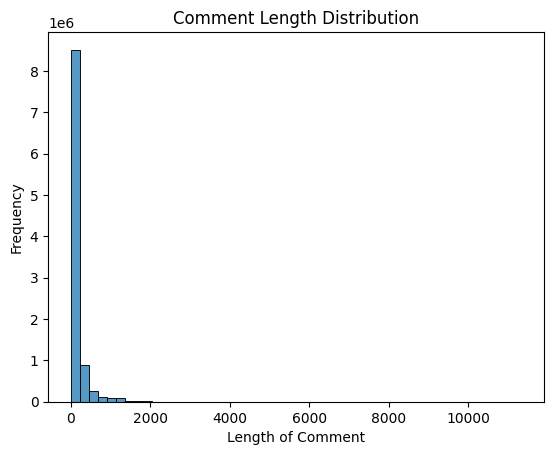

In [ ]:
# Comment length distribution
df_comments['comment_length'] = df_comments['body'].dropna().apply(len)
sns.histplot(df_comments['comment_length'], bins=50)
plt.title('Comment Length Distribution')
plt.xlabel('Length of Comment')
plt.ylabel('Frequency')
plt.show()


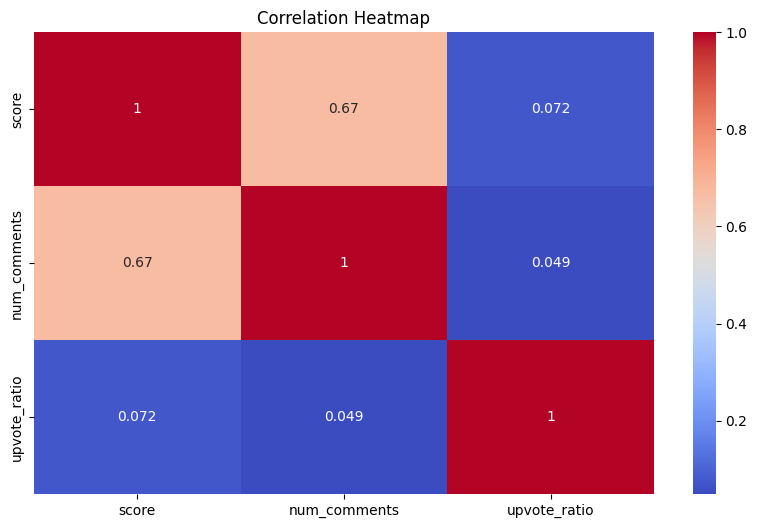

In [ ]:
# Correlation heatmap for numeric columns
plt.figure(figsize=(10, 6))
sns.heatmap(df_train[['score', 'num_comments', 'upvote_ratio']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# Missing values percentage for each dataset
for df, name in zip([df_train, df_test, df_validate, df_comments], ['Train', 'Test', 'Validate', 'Comments']):
    missing_percentage = df.isnull().mean() * 100
    print(f"Missing Values in {name} Dataset (%):\n", missing_percentage[missing_percentage > 0].sort_values(ascending=False))
    print("\n")



Missing Values in Train Dataset (%):
 Unnamed: 0.1            72.432813
Unnamed: 0.1.1          72.432813
linked_submission_id    72.432813
domain                  27.567187
num_comments            27.567187
upvote_ratio            27.567187
image_url               27.402536
author                  16.937252
clean_title              8.588870
title                    8.407935
dtype: float64


Missing Values in Test Dataset (%):
 Unnamed: 0.1            72.620181
Unnamed: 0.1.1          72.620181
linked_submission_id    72.620181
image_url               27.416598
num_comments            27.379819
domain                  27.379819
upvote_ratio            27.379819
author                  16.974601
clean_title              8.613864
title                    8.426723
dtype: float64


Missing Values in Validate Dataset (%):
 Unnamed: 0.1            72.321622
Unnamed: 0.1.1          72.321622
linked_submission_id    72.321622
domain                  27.678378
num_comments            27.678378


In [ ]:
# List all Unnamed columns in each dataset
for df, name in zip([df_train, df_test, df_validate, df_comments], ['Train', 'Test', 'Validate', 'Comments']):
    unnamed_cols = [col for col in df.columns if 'Unnamed' in col]
    print(f"{name} Dataset - Unnamed Columns: {unnamed_cols}")


Train Dataset - Unnamed Columns: ['Unnamed: 0.2', 'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1']
Test Dataset - Unnamed Columns: ['Unnamed: 0.2', 'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1']
Validate Dataset - Unnamed Columns: ['Unnamed: 0.2', 'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1']
Comments Dataset - Unnamed Columns: ['Unnamed: 0']


In [ ]:
# Display first few rows and unique values of each Unnamed column
for df, name in zip([df_train, df_test, df_validate, df_comments], ['Train', 'Test', 'Validate', 'Comments']):
    unnamed_cols = [col for col in df.columns if 'Unnamed' in col]
    print(f"\n{name} Dataset - Unnamed Columns:")

    for col in unnamed_cols:
        print(f"\nColumn: {col}")
        print("Sample Data:\n", df[col].head())
        print("Unique Values Count:", df[col].nunique())
        print("Unique Values:\n", df[col].unique())



Train Dataset - Unnamed Columns:

Column: Unnamed: 0.2
Sample Data:
 0    0
1    1
2    2
3    3
4    4
Name: Unnamed: 0.2, dtype: int64
Unique Values Count: 878218
Unique Values:
 [     0      1      2 ... 878215 878216 878217]

Column: Unnamed: 0
Sample Data:
 0    0
1    1
2    2
3    3
4    4
Name: Unnamed: 0, dtype: int64
Unique Values Count: 878218
Unique Values:
 [     0      1      2 ... 878215 878216 878217]

Column: Unnamed: 0.1
Sample Data:
 0         NaN
1    155885.0
2         NaN
3         NaN
4    282323.0
Name: Unnamed: 0.1, dtype: float64
Unique Values Count: 242100
Unique Values:
 [    nan 155885. 282323. ... 179553. 283359.  62754.]

Column: Unnamed: 0.1.1
Sample Data:
 0          NaN
1     714550.0
2          NaN
3          NaN
4    1228398.0
Name: Unnamed: 0.1.1, dtype: float64
Unique Values Count: 242100
Unique Values:
 [     nan  714550. 1228398. ...  816673. 1232382.  280950.]

Test Dataset - Unnamed Columns:

Column: Unnamed: 0.2
Sample Data:
 0    0
1    1
2 

Unnamed: 0.2 and Unnamed: 0 in the Train, Test, and Validate datasets:

These columns contain unique, sequential integers starting from 0 up to the row count, acting as row indices.
They are likely redundant as they appear to be row identifiers that don’t add value, especially since DataFrames in pandas already have an inherent index.
Unnamed: 0.1 and Unnamed: 0.1.1 in the Train, Test, and Validate datasets:

These columns contain mostly numerical values but with a significant amount of NaN values.
The columns have many unique values (242,100 in Train, 25,311 in Test, and 25,587 in Validate), suggesting they might represent unique IDs or external references. However, without specific labels, it’s hard to ascertain their purpose.
Given the high number of missing values, it’s likely these are not essential for initial analysis unless you have information indicating they serve a unique function.
Unnamed: 0 in the Comments dataset:

Similar to the Train, Test, and Validate datasets, this column appears to be a row index with unique values for each row, which is redundant.
Recommendations
Drop Unnamed: 0.2, Unnamed: 0, and Unnamed: 0 (in Comments): These columns are merely row identifiers that pandas can already track with its internal index, so they don’t add new information.
Evaluate Unnamed: 0.1 and Unnamed: 0.1.1: These columns have a lot of unique values and missing data

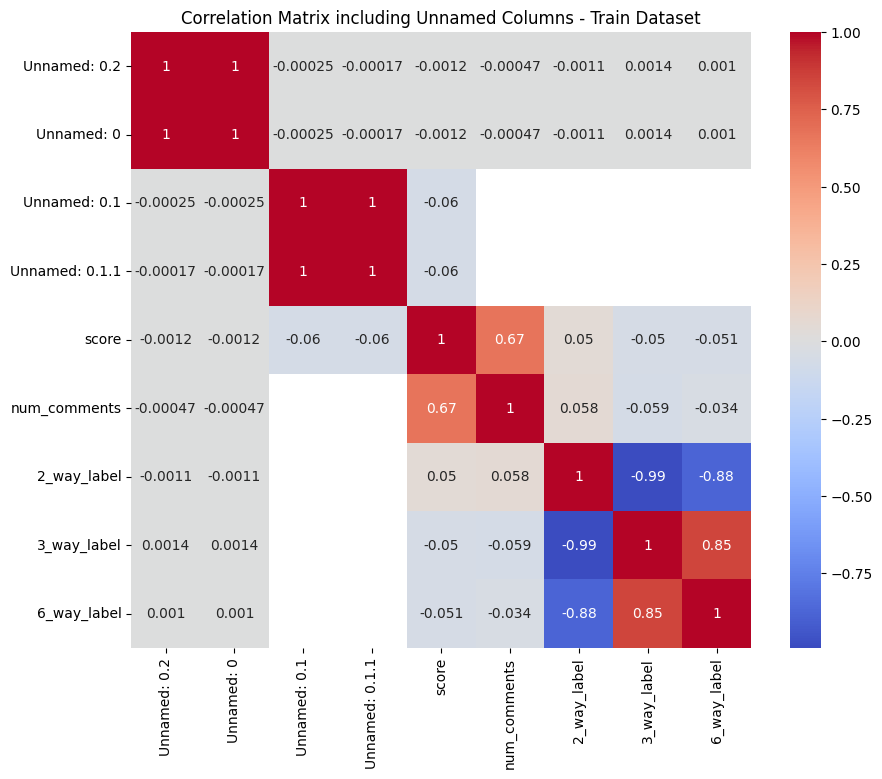

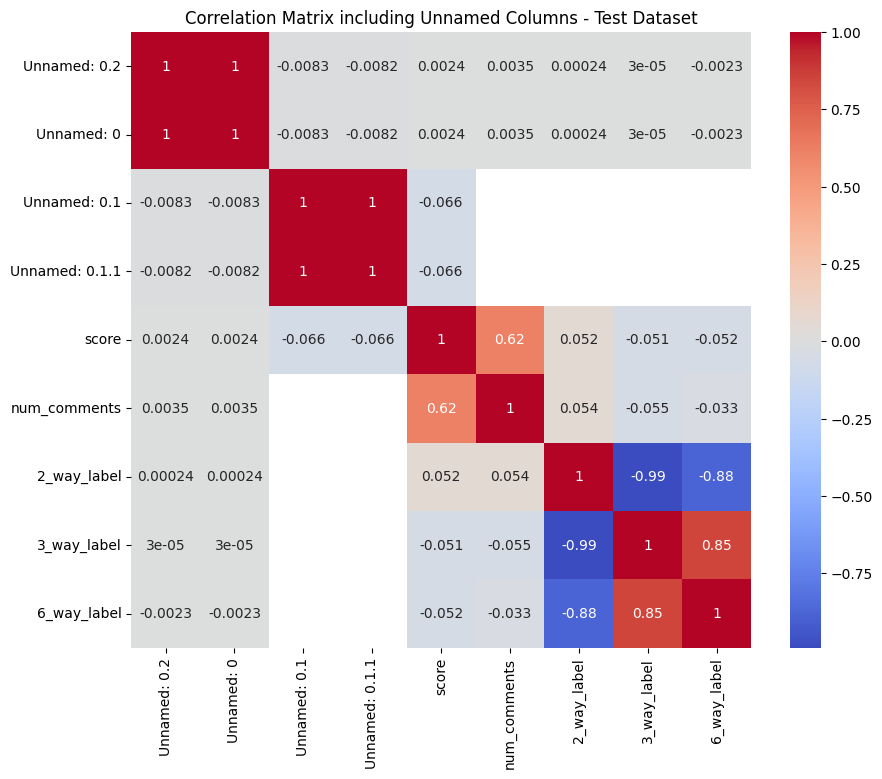

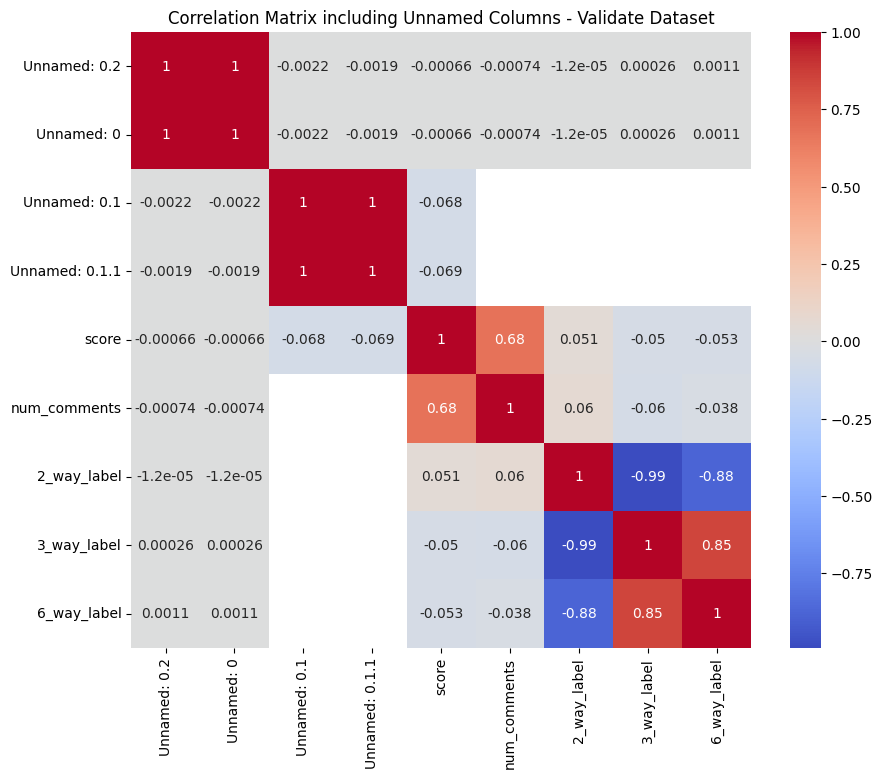

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot correlation matrix including Unnamed columns if they have multiple unique values
for df, name in zip([df_train, df_test, df_validate], ['Train', 'Test', 'Validate']):
    unnamed_cols = [col for col in df.columns if 'Unnamed' in col and df[col].nunique() > 1]

    if unnamed_cols:  # Only if there are Unnamed columns with more than 1 unique value
        plt.figure(figsize=(10, 8))
        sns.heatmap(df[unnamed_cols + ['score', 'num_comments', '2_way_label', '3_way_label', '6_way_label']].corr(), annot=True, cmap='coolwarm')
        plt.title(f'Correlation Matrix including Unnamed Columns - {name} Dataset')
        plt.show()


Insights from the Correlation Matrices
Unnamed: 0.2 and Unnamed: 0:

Both columns have a perfect correlation (1.0) with each other, which suggests they are redundant.
They likely represent row indices and don’t carry meaningful information related to other features, as they show minimal to no correlation with other columns like score, num_comments, or any of the label columns.
Recommendation: These columns can be safely removed from each dataset as they do not contribute any additional or meaningful information.
Unnamed: 0.1 and Unnamed: 0.1.1:

These two columns have a perfect correlation (1.0) with each other, indicating they may contain duplicate information or represent the same feature in slightly different formats.
The correlations between these columns and other features are generally very low, close to zero, indicating that they do not contribute significantly to predicting labels or understanding data distributions.
Recommendation: Unless there’s specific metadata about these columns that indicates their importance, they can likely be removed as they do not appear to be useful for analysis or modeling.
Other Features (like score, num_comments, 2_way_label, 3_way_label, and 6_way_label):

We observe expected correlations, such as the high correlation between 2_way_label, 3_way_label, and 6_way_label, which makes sense as they are different levels of classification for the same dataset.
score and num_comments show a moderate correlation (around 0.6-0.7), suggesting posts with higher scores tend to have more comments.
Final Recommendation
Based on this analysis, the Unnamed columns (Unnamed: 0.2, Unnamed: 0, Unnamed: 0.1, and Unnamed: 0.1.1) do not provide meaningful information and can be dropped from each dataset. This will help streamline the dataset and reduce unnecessary complexity.

In [ ]:
# Drop identified unnecessary columns in all datasets
columns_to_drop = ['Unnamed: 0.2', 'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1']

df_train.drop(columns=columns_to_drop, inplace=True)
df_test.drop(columns=columns_to_drop, inplace=True)
df_validate.drop(columns=columns_to_drop, inplace=True)
df_comments.drop(columns=['Unnamed: 0'], inplace=True)


In [ ]:
# Checking the percentage of missing values in each dataset
for df, name in zip([df_train, df_test, df_validate, df_comments], ['Train', 'Test', 'Validate', 'Comments']):
    missing_percentage = df.isnull().mean() * 100
    print(f"\nMissing Values in {name} Dataset (%):")
    print(missing_percentage[missing_percentage > 0].sort_values(ascending=False))



Missing Values in Train Dataset (%):
linked_submission_id    72.432813
domain                  27.567187
num_comments            27.567187
upvote_ratio            27.567187
image_url               27.402536
author                  16.937252
clean_title              8.588870
title                    8.407935
dtype: float64

Missing Values in Test Dataset (%):
linked_submission_id    72.620181
image_url               27.416598
num_comments            27.379819
domain                  27.379819
upvote_ratio            27.379819
author                  16.974601
clean_title              8.613864
title                    8.426723
dtype: float64

Missing Values in Validate Dataset (%):
linked_submission_id    72.321622
domain                  27.678378
num_comments            27.678378
upvote_ratio            27.678378
image_url               27.485829
author                  16.958375
clean_title              8.554368
title                    8.354247
dtype: float64

Missing Values in Comm

linked_submission_id (~72% missing):
This column has a very high percentage of missing values across all datasets. It likely represents an ID for linked submissions, which might not be critical for fake news detection.
Consider dropping this column unless it serves a specific purpose in your analysis. To decide whether to keep or drop linked_submission_id, you can investigate its characteristics and potential usefulness in your analysis.

In [ ]:
# Count unique values and their frequency
print("Unique values in `linked_submission_id`:", df_train['linked_submission_id'].nunique())
print("\nTop 10 most frequent linked_submission_id values:")
print(df_train['linked_submission_id'].value_counts().head(10))


Unique values in `linked_submission_id`: 84527

Top 10 most frequent linked_submission_id values:
linked_submission_id
7m831k    324
3yekcl    266
5ke0iq    248
2qg0lx    214
1u80kz    137
1geobw     80
25bn9r     79
1pbfyw     76
1y5gac     76
1875c5     76
Name: count, dtype: int64


In [ ]:
# Display a sample of rows where linked_submission_id is not null
df_train[df_train['linked_submission_id'].notnull()].sample(10)


,author,clean_title,created_utc,domain,hasImage,id,image_url,linked_submission_id,num_comments,score,subreddit,title,upvote_ratio,2_way_label,3_way_label,6_way_label
417430,ApiContraption,NaN,1.531745e+09,NaN,True,e2h7u7s,https://i.redd.it/atywfw772ba11%2ejpg,8zaklc,NaN,1,psbattle_artwork,NaN,NaN,0,2,4
596460,Frogb3at,belly face,1.502020e+09,NaN,True,dl8jjlg,http://i.imgur.com/oihtWoN.jpg,6rxhnk,NaN,18,psbattle_artwork,Belly face!,NaN,0,2,4
397038,wee_froggy,reasons to be cheerful,1.443652e+09,NaN,True,cvjugu2,http://i.imgur.com/sFXijSx.jpg,3n0i92,NaN,2,psbattle_artwork,Reasons to be cheerful,NaN,0,2,4
363018,mtllewellyn5000,leprechaun q tip,1.415903e+09,NaN,True,cm1jxc0,http://i.imgur.com/SUCQrl2.jpg,2m5paa,NaN,2,psbattle_artwork,leprechaun Q tip,NaN,0,2,4
522322,ApiContraption,NaN,1.451879e+09,NaN,True,cyl591r,http://i.imgur.com/iz2mVTk%2ejpg,3zd214,NaN,1,psbattle_artwork,NaN,NaN,0,2,4
390275,PSBBot,available here,1.567778e+09,NaN,True,ez9bbse,https://i.redd.it/ri6bgr7nbzk31.jpg,d0gzeh,NaN,1,psbattle_artwork,available here,NaN,0,2,4
170131,wasserlust,ill stir fry you in my wok,1.490414e+09,NaN,True,dfdqbbl,http://i.imgur.com/OPPwTwt.jpg,61can7,NaN,3,psbattle_artwork,I'll stir fry you in my wok,NaN,0,2,4
504573,undercome,i was in the neighborhood,1.377022e+09,NaN,True,cbrp15k,http://i.imgur.com/hLrgAjR.jpg,1koy39,NaN,11,psbattle_artwork,I was in the neighborhood...,NaN,0,2,4
779663,Djugdish,thesearerapids,1.506025e+09,NaN,True,dnbofiq,https://i.imgur.com/ULJdBGG.jpg,71lk03,NaN,6,psbattle_artwork,These...are...RAPIDS!,NaN,0,2,4
53313,Itsthatdude34,bald steven seagal,1.481017e+09,NaN,True,daum92d,http://i.imgur.com/bExCvs3.jpg,5gn4z7,NaN,4,psbattle_artwork,Bald Steven Seagal,NaN,0,2,4


In [ ]:
# Correlation check (encoded as binary presence of linked_submission_id)
df_train['has_linked_submission'] = df_train['linked_submission_id'].notnull().astype(int)
correlation_matrix = df_train[['has_linked_submission', 'score', 'num_comments', 'upvote_ratio']].corr()
print("Correlation of linked_submission_id presence with other features:")
print(correlation_matrix)


Correlation of linked_submission_id presence with other features:
                       has_linked_submission     score  num_comments  \
has_linked_submission               1.000000 -0.053632           NaN   
score                              -0.053632  1.000000      0.669590   
num_comments                             NaN  0.669590      1.000000   
upvote_ratio                             NaN  0.072255      0.048956   

                       upvote_ratio  
has_linked_submission           NaN  
score                      0.072255  
num_comments               0.048956  
upvote_ratio               1.000000  


In [ ]:
# Group by linked_submission_id and aggregate to see if there are similarities
linked_group = df_train.groupby('linked_submission_id').agg({
    'title': 'nunique',
    'score': 'mean',
    'num_comments': 'mean',
    'upvote_ratio': 'mean'
}).sort_values(by='title', ascending=False)

print("Group analysis by linked_submission_id:")
print(linked_group.head(10))


Group analysis by linked_submission_id:
                      title      score  num_comments  upvote_ratio
linked_submission_id                                              
7m831k                  240   5.731481           NaN           NaN
3yekcl                  211  10.906015           NaN           NaN
5ke0iq                  199   5.822581           NaN           NaN
2qg0lx                  180  12.892523           NaN           NaN
1u80kz                  130  33.919708           NaN           NaN
1geobw                   76  21.650000           NaN           NaN
1y5gac                   75   1.000000           NaN           NaN
25bn9r                   75  16.329114           NaN           NaN
1875c5                   70  31.921053           NaN           NaN
1pbfyw                   66  20.565789           NaN           NaN


Based on the analysis of linked_submission_id, here are the key insights:

High Number of Unique Values:

There are 84,527 unique linked_submission_id values, which suggests this column represents links to many distinct posts or threads.
Frequent IDs:

Some linked_submission_id values appear very frequently (e.g., 7m831k appears 324 times), indicating that certain submissions are referenced by multiple posts. This could imply that these IDs represent popular or central topics that many posts link to.
Weak Correlation with Other Features:

The presence of linked_submission_id (represented by has_linked_submission) shows minimal correlation with other features like score, num_comments, and upvote_ratio. This suggests that posts with or without linked_submission_id do not differ significantly in terms of these features, reducing its predictive value for these particular metrics.
Group Analysis Findings:

For some frequently referenced linked_submission_id values, the title count is high, suggesting that multiple unique posts link to the same linked_submission_id. This may indicate that these posts are part of larger discussions or chains, potentially adding context to each other. For a task focused on detecting fake news, it’s generally best to keep features that directly impact or describe the content, author, or engagement of each individual post. Since linked_submission_id primarily serves to link posts to related submissions, it may not contribute much to fake news detection directly.

In [ ]:
# Drop linked_submission_id from each dataset
for df in [df_train, df_test, df_validate]:
    df.drop(columns=['linked_submission_id'], inplace=True)


In [ ]:
# Fill missing values in Train, Test, and Validate datasets
for df in [df_train, df_test, df_validate]:
    # Fill categorical or text columns with a placeholder
    df['domain'].fillna("unknown", inplace=True)
    df['author'].fillna("unknown", inplace=True)
    df['image_url'].fillna("no_image", inplace=True)
    df['title'].fillna("missing", inplace=True)
    df['clean_title'].fillna("missing", inplace=True)

    # Fill numerical columns with specific values
    df['num_comments'].fillna(0, inplace=True)  # assuming missing comments = 0
    df['upvote_ratio'].fillna(df['upvote_ratio'].mean(), inplace=True)  # filling with mean

# Handle missing values in the Comments dataset
df_comments['author'].fillna("unknown", inplace=True)
df_comments['body'].fillna("missing", inplace=True)
df_comments['parent_id'].fillna("missing", inplace=True)
df_comments['submission_id'].fillna("missing", inplace=True)
df_comments['ups'].fillna(0, inplace=True)  # assuming missing upvotes = 0


<ipython-input-25-6d2aa45e4670>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['domain'].fillna("unknown", inplace=True)
<ipython-input-25-6d2aa45e4670>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

Explanation of Fill Values
Text/Categorical Columns (domain, author, image_url, title, clean_title): Filled with placeholders like "unknown", "no_image", or "missing" to indicate the absence of information without dropping rows.
Numeric Columns (num_comments, upvote_ratio, ups):
num_comments and ups are filled with 0 under the assumption that missing values indicate no comments or upvotes.
upvote_ratio is filled with the mean, as this metric often represents engagement in a normalized way.

In [ ]:
# Verify that all missing values have been handled
for df, name in zip([df_train, df_test, df_validate, df_comments], ['Train', 'Test', 'Validate', 'Comments']):
    print(f"\nRemaining Missing Values in {name} Dataset:")
    print(df.isnull().sum().sort_values(ascending=False))



Remaining Missing Values in Train Dataset:
author                   0
clean_title              0
created_utc              0
domain                   0
hasImage                 0
id                       0
image_url                0
num_comments             0
score                    0
subreddit                0
title                    0
upvote_ratio             0
2_way_label              0
3_way_label              0
6_way_label              0
has_linked_submission    0
dtype: int64

Remaining Missing Values in Test Dataset:
author          0
clean_title     0
created_utc     0
domain          0
hasImage        0
id              0
image_url       0
num_comments    0
score           0
subreddit       0
title           0
upvote_ratio    0
2_way_label     0
3_way_label     0
6_way_label     0
dtype: int64

Remaining Missing Values in Validate Dataset:
author          0
clean_title     0
created_utc     0
domain          0
hasImage        0
id              0
image_url       0
num_comments

Recommended Columns for TF-IDF Vectorization
Train, Test, and Validate Datasets:

Column Choice: title and clean_title
Reason: Both title and clean_title are the main text content of the posts and would provide meaningful input for fake news detection.
title: If this column represents the raw title, it could capture information as it was originally posted.
clean_title: this column is a processed or filtered version of the title, it might reduce noise.
Comments Dataset:

Column Choice: body
Reason: This column likely contains the text of user comments, which can provide additional context or clues about the nature of the post. Comments can be helpful if you plan to incorporate user engagement in the fake news detection task.

sampling connected data while reducing the number of features in TF-IDF to improve efficiency. Since df_train is large enough, we could combine df_train and df_validate into a single dataset and then split it into new Train, Validate, and Test sets. This way, we ensure that we have enough data in each subset without relying on overlapping IDs across different datasets.

Reduce dataset size and compare models

In [ ]:
from sklearn.model_selection import train_test_split

# Combine Train and Validate datasets if needed
df_combined = pd.concat([df_train, df_validate])

# Split combined data into new Train, Validate, and Test sets (e.g., 70% Train, 15% Validate, 15% Test)
df_train_new, df_temp = train_test_split(df_combined, test_size=0.3, random_state=42)
df_validate_new, df_test_new = train_test_split(df_temp, test_size=0.5, random_state=42)

# Verify new dataset sizes
print("New Train Dataset Size:", df_train_new.shape[0])
print("New Validate Dataset Size:", df_validate_new.shape[0])
print("New Test Dataset Size:", df_test_new.shape[0])


New Train Dataset Size: 679463
New Validate Dataset Size: 145599
New Test Dataset Size: 145600


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define a function for TF-IDF vectorization with reduced features
def vectorize_column_reduced(train_text, validate_text, test_text, max_features=1000):
    tfidf = TfidfVectorizer(max_features=max_features)
    X_train = tfidf.fit_transform(train_text)
    X_validate = tfidf.transform(validate_text)
    X_test = tfidf.transform(test_text)
    return X_train, X_validate, X_test, tfidf

# Apply TF-IDF on `title` column with reduced features
X_train_title, X_validate_title, X_test_title, tfidf_title = vectorize_column_reduced(
    df_train_new['title'].fillna(''),
    df_validate_new['title'].fillna(''),
    df_test_new['title'].fillna('')
)

# Define target labels for the new Train, Validate, and Test sets
y_train = df_train_new['2_way_label']
y_validate = df_validate_new['2_way_label']
y_test = df_test_new['2_way_label']

print("TF-IDF Vectorization complete.")


TF-IDF Vectorization complete.
